# 연구 목표 수립

- 유사 서비스 구현
  - 파파고, 구글 번역
  - **언어감지**를 머신러닝으로 구현해 웹으로 서비스해보기
- 목표
  - 머신러닝으로 만들어진 모델이 어떻게 적용되는지 이해
  - 앞선 과정과 머신러닝에서 산출까지 어떻게 연결되는지 이해
- 조건
  - 머신러닝을 배우지 않았기 때문에 필요한 것 외에는 전부 가정하고 진행함
  - 언어 감지 영역
    - 알파벳을 사용하는 언어권 대상
    - A to Z (26개) 문자 대상
    - 논문 참고
      - 알파벳을 문자로 사용하는 국가별로 언어체계의 A to Z 까지의 사용 빈도가 다르다(관련 논문)
      - 이 주장(알파벳 사용 빈도가 다르다)을 기반으로 프로젝트 진행
      - 문자 26개, 정답 1개
      - shape = (n, 26 + 1)
      - **A to Z 까지 특정 말뭉치상에 등장한 빈도수 전처리 필요**
      - 예측 결과
        - 이 말뭉치는 영어입니다. / 이 말뭉치는 프랑스어입니다.
        - 위와 같은 표현은 지도학습(정답이 있기 때문)
        - 정답에 카테고리화가 되어 있어서 분류의 문제임
- 산출물
  - 웹 서비스 구현
    - 페이지 1장
    - 가장 간단하게 flask 를 통해 구현
      - 장점 : 마이크로 에디션, 경량, 높은 자유도, 모듈이식이 간단

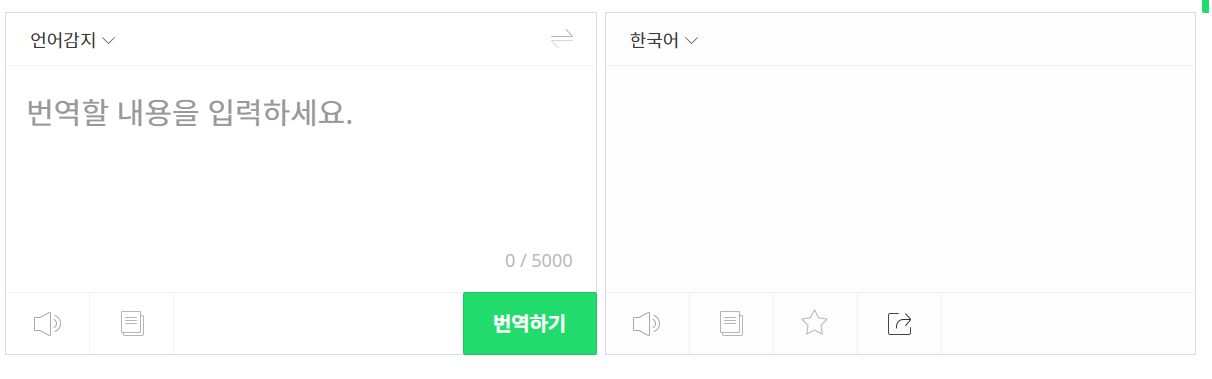

In [67]:
from IPython.display import Image

# 산출물 예시
Image('/content/drive/MyDrive/머신러닝/res/산출물.png')

# 데이터 수집

- 실전 방식
  - 여기서는 받은 test, train 데이터 활용

- 수업 방식
  - 위키 피디아에서 데이터 수집 -> 전처리 -> 정규화 -> 정제
  - 데이터 형태 = (n, 26 + 1)
  - 26개 독립변수는 수치(빈도수)로, 1개의 종속변수는 국가코드로 표현(en, fr,...)
  - 아래 링크 데이터를 기준으로 말뭉치를 가져와서 데이터화
    - https://en.wikipedia.org/wiki/BTS
    - 타겟 사이트 점검 결과 level 3 웹 크롤링 기술만으로 가능
      - BS4를 사용해 필요한 만큼 추출(텍스트만 추출)
      - BS4 -> html 텍스트 -> 파싱 -> Dom tree -> html을 탐색해서 원문만 추출(css selector or xpaht)
      - **css selector 사용**
        - **#mw-content-text p**
        - 이 요소 하위에 있는 텍스트만 추출

- 제공된 데이터 활용(최종)

## 모듈 가져오기

In [ ]:
# 있는지 확인
!pip list

In [14]:
import urllib.request as req
from bs4 import BeautifulSoup

## 사이트 접속

In [19]:
target_site = 'https://en.wikipedia.org/wiki/BTS'
res = req.urlopen(target_site)
res

## 파싱

- 파싱 : html을 DOM(Document Object Model) 모델로 로드하는 작업
- html의 마크업 언어를 객체화해서 조작, 탐색하게끔 제공해해주는 기술
- 파서(parser)를 활용
  - 'html5lib' : 느리지만 대용량 가능하고, 정확하게 처리함

In [20]:
soup = BeautifulSoup(res, 'html5lib')
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en"><head>
<meta charset="utf-8"/>
<title>BTS - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"5d8d9bd4-5df7-480c-be65-25e7c72b18c6","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"BTS","wgTitle":"BTS","wgCurRevisionId":1078565292,"wgRevisionId":1078565292,"wgArticleId":39862325,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 uses Japanese-language script (ja)","CS1 Japanese-language sources (ja)","CS1 uses Korean-language script (ko)","CS1 Korean-language sources (ko)","CS1 maint: url-status","Good ar

## 데이터 추출

In [23]:
# 추출
# select : 해당 css selector와 일치하는 모든 요소를 가져옴 -> list
ps = soup.select('#mw-content-text p', )
len(ps)

54

In [57]:
# text : 태그는 지우고 텍스트만 추출하기
tmp = list()

for p in ps :
  tmp.append(p.text)

# 리스트 내포형 : 훨씬 간단함
# tmp = [p.text for p in ps]

In [52]:
# 확인
tmp

# 알파벳만 남아야 하는데 데이터가 지저분함

['\n',
 '\n\n\n',
 'BTS (Korean:\xa0방탄소년단; RR:\xa0Bangtan Sonyeondan), also known as the Bangtan Boys, is a South Korean boy band that was formed in 2010 and debuted in 2013 under Big Hit Entertainment.[5] The septet—consisting of members Jin, Suga, J-Hope, RM, Jimin, V, and Jungkook—co-writes and co-produces much of their own output. Originally a hip hop group, their musical style has evolved to include a wide range of genres. Their lyrics, often focused on personal and social commentary, touch on the themes of mental health, troubles of school-age youth and coming of age, loss, the journey towards loving oneself, and individualism. Their work also often references literature and psychological concepts and includes an alternative universe storyline.\n',
 'After debuting in 2013 with their single album 2 Cool 4 Skool, BTS released their first Korean-language studio album, Dark & Wild, and Japanese-language studio album, Wake Up, in 2014. The group\'s second Korean studio album, Wings (

- 데이터 수집 단계에서 데이터 전처리 단계로 산출물을 넘길 때, 말뭉치(하나의 문자열 형태)로 넘기기

In [58]:
# 리스트 내의 문자열들을 하나의 문자열로 전달하기
# 구분자를 넣고 한 개의 문자열로 통합하기 -> 문자열.join(연속형 데이터)
tmps = ''.join(tmp)
tmps

'\n\n\n\nBTS (Korean:\xa0방탄소년단; RR:\xa0Bangtan Sonyeondan), also known as the Bangtan Boys, is a South Korean boy band that was formed in 2010 and debuted in 2013 under Big Hit Entertainment.[5] The septet—consisting of members Jin, Suga, J-Hope, RM, Jimin, V, and Jungkook—co-writes and co-produces much of their own output. Originally a hip hop group, their musical style has evolved to include a wide range of genres. Their lyrics, often focused on personal and social commentary, touch on the themes of mental health, troubles of school-age youth and coming of age, loss, the journey towards loving oneself, and individualism. Their work also often references literature and psychological concepts and includes an alternative universe storyline.\nAfter debuting in 2013 with their single album 2 Cool 4 Skool, BTS released their first Korean-language studio album, Dark & Wild, and Japanese-language studio album, Wake Up, in 2014. The group\'s second Korean studio album, Wings (2016), was their

- 미리 전처리 해주기
- A to Z 가 아닌 문자는 모두 제거하기(정규식 활용)

In [59]:
import re

In [63]:
# [] : 문자(글자) 한 개
# a-z : 알파벳 a ~ z 까지 26개 중 한 개
# [a-z] : a ~ z 중 한 개
# [a-zA-Z] : 대소문자 52개 중 아무거나 한 개
# * : 0 ~ 무한
# [^] : [^...] 대괄호 안에 있는 글자는 제외

# 패턴 정하기
pattern = '[^a-zA-Z]*'

# re 라이브러리 사용해서 패턴 적용
p = re.compile(pattern)

# 알파벳이 아닌 문자들을 찾아서 빈 칸으로 대체함
tmp = p.sub('', tmps)

# 일반적으로 영어 알파벳을 자연어 처리할 때는 보통 소문자로 바꿈
tmp = tmp.lower()

In [64]:
# 확인하기
tmp

'btskoreanrrbangtansonyeondanalsoknownasthebangtanboysisasouthkoreanboybandthatwasformedinanddebutedinunderbighitentertainmenttheseptetconsistingofmembersjinsugajhopermjiminvandjungkookcowritesandcoproducesmuchoftheirownoutputoriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenrestheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismtheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineafterdebutinginwiththeirsinglealbumcoolskoolbtsreleasedtheirfirstkoreanlanguagestudioalbumdarkwildandjapaneselanguagestudioalbumwakeupinthegroupssecondkoreanstudioalbumwingswastheirfirsttosellonemillioncopiesinsouthkoreabybtscrossedintotheglobalmusicmarketleadingthekoreanwaveintotheunitedstatesandbreakingnumeroussalesrecordstheybecamethefirstkoreangrouptoreceiveacertificationfromtherecordingindustryassociationofamericaria

# 데이터 준비 / 전처리 / 정제

# 데이터 분석

# 모델 구축

# 시스템 통합, 산출물, 보고서